## Worksheet 5

In this worksheet, you will explore and be able to appreciate the potential of using different features to solve a classification problem 

1. Begin by importing the *two moons* dataset from ``sklearn``. Draw from this 500 samples, with a noise of 0.2. (Naturally, you will need to import the appropriate python packages for this)

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

X, y = make_moons(n_samples=500, noise=0.2)

2. Do the usual train-test split of the data. Fit a logistic regression model to a subset (training set) of the data, and evaluate the accuracy on the test set. 

a. What is the accuracy of this model? 

b. Is the problem linearly separable?

c. Plot (scatter) the data again and overlay the hyperplane determined by the obtained classifier

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3)
model = LogisticRegression().fit(xtrain,ytrain)
model.score(xtest,ytest)
# Our accuracy score is 0.8, so about 20% of the moon data can't be explained with a linear model,
# thus, the problem might not be linearly seperable. 

0.8

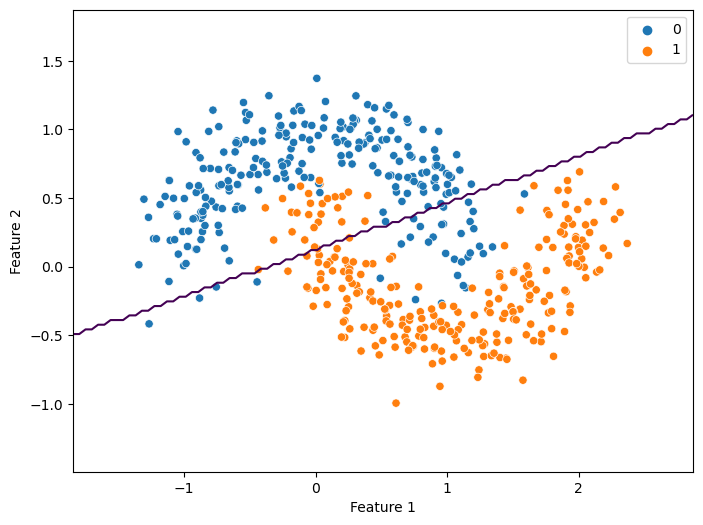

In [3]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z, levels=[0.5])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

3. You will now attempt to make the problem more linearly separable by constructing suitable non-linear features from the data you were given. Noting that each sample is a vector $x\in\mathbb R^2$, $x = [x_1,x_2]$, construct new features by computing polynomials of these two coordinates (e.g. $x_1^2, x_1^3, x_1x_2$, etc). Explore a few options (i.e., construct a few versions of these new features for different choices of polynomials), and train the same model on these different choices of features. Finally, pick the best performing one.

0.94


/Users/Alex_1/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


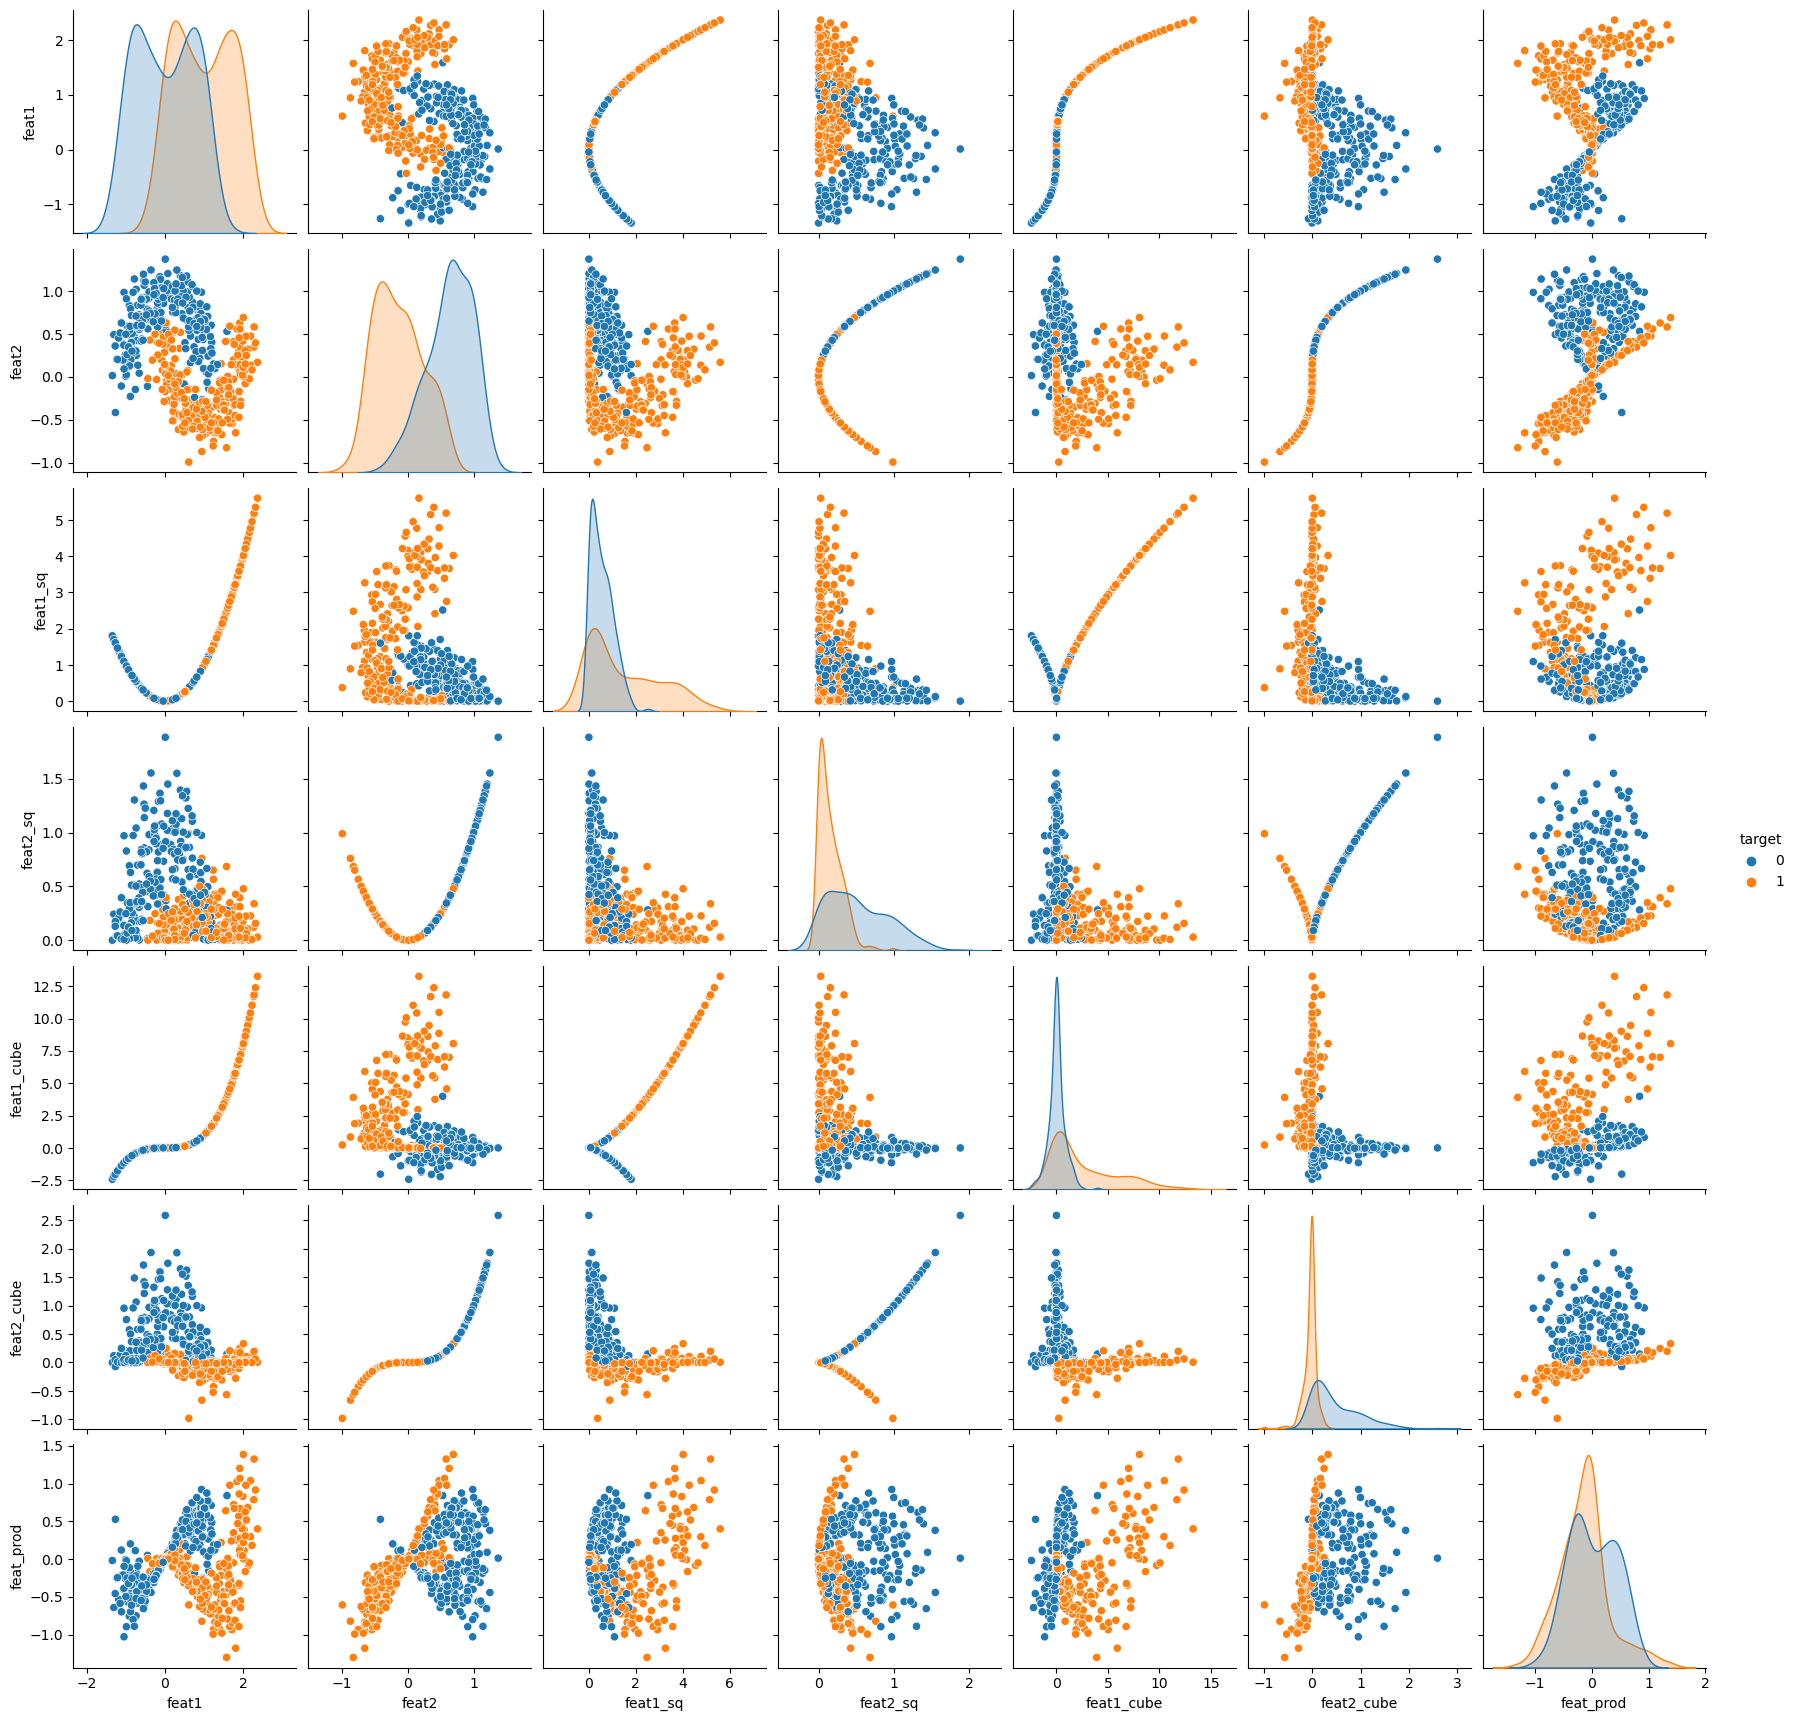

In [4]:
feat1_sq = X[:, 0] ** 2
feat2_sq = X[:, 1] ** 2
feat1_cube = X[:, 0] ** 3
feat2_cube = X[:, 1] ** 3
feat_prod = X[:,0]*X[:,1]

Z = np.column_stack((X[:,0], X[:, 1], feat1_sq, feat2_sq, feat1_cube, feat2_cube, feat_prod))
xtrain, xtest, ytrain, ytest = train_test_split(Z, y, test_size = 0.3, random_state = 42)
model_eng = LogisticRegression().fit(xtrain,ytrain)
print(model_eng.score(xtest,ytest))

data = pd.DataFrame({
    'feat1': X[:, 0],
    'feat2': X[:, 1],
    'feat1_sq': feat1_sq,
    'feat2_sq': feat2_sq,
    'feat1_cube': feat1_cube,
    'feat2_cube': feat2_cube,
    'feat_prod': feat_prod,
    'target': y
})

sns.pairplot(data, hue='target')
plt.show()

# while a few of the plots look seperable, the two cube graphs have the best score. 

4. For the best performing choice of features, plot (use ``plt.stem``) the coefficients of the obtained classifier. Try now plotting (scatter) the data choosing 2 coordinates of the resulting features. Is the data now more separable?

In [5]:
Z = np.column_stack((feat2_cube, feat1_cube))
xtrain, xtest, ytrain, ytest = train_test_split(Z, y, test_size = 0.3, random_state = 42)
model_eng = LogisticRegression().fit(xtrain,ytrain)
print(model_eng.score(xtest,ytest))

0.88


5. You are told to provide an estimate of the performance of the chosen (best performing) model. How would you compute an unbiased estimate of the risk of the chosen one?

In [7]:
# an unbiased estimate of the risk is simply the error of the model
print (1-model_eng.score(xtest,ytest))

0.12
